# Notebook oficial - TP Datos

In [1]:
# Importando librerias
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import warnings

In [2]:
#Carga del dataset
df_tweets = pd.read_csv('data/train.csv')
#Dimension
print('La dimension del dataset es: ',df_tweets.shape[0], 'registros,', df_tweets.shape[1],'columnas')
# Vista de los primeros registros
df_tweets.head(5)
# Data:
# id - identificador unico para cada tweet
# keyword - un keyword para el tweet (podría faltar)
# location - ubicación desde donde fue enviado (podría no estar)
# text - el texto del tweet
# target - indica si se trata de un desastre real (1) o no (0)

La dimension del dataset es:  7613 registros, 5 columnas


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
#Definición de tipos
df_tweets['id'] = df_tweets['id'].astype(int)
df_tweets['keyword'] = df_tweets['keyword'].astype('string')
df_tweets['location'] = df_tweets['location'].astype('string')
df_tweets['text'] = df_tweets['text'].astype('string')
df_tweets['target'] = df_tweets['target'].astype('bool')

In [4]:
#Elimino duplicados
df_tweets.drop_duplicates(inplace=True)

In [5]:
df_tweets.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613
unique,NaN,221,3341,7503,2
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,False
freq,NaN,45,104,10,4342
mean,5441.934848,NaN,NaN,NaN,NaN
std,3137.116090,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,2734.000000,NaN,NaN,NaN,NaN
50%,5408.000000,NaN,NaN,NaN,NaN
75%,8146.000000,NaN,NaN,NaN,NaN


In [6]:
print(df_tweets.info())
# Tenemos:
# -> 100% datos id, text y target
# -> 99,19% datos keyword
# -> 66,73% datos location

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int32 
 1   keyword   7552 non-null   string
 2   location  5080 non-null   string
 3   text      7613 non-null   string
 4   target    7613 non-null   bool  
dtypes: bool(1), int32(1), string(3)
memory usage: 275.1 KB
None


In [7]:
keywords = df_tweets['keyword']
print('Las key son',len(keywords.unique()), 'keywords:')
keywords.value_counts()

Las key son 222 keywords:


fatalities               45
deluge                   42
armageddon               42
body%20bags              41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: Int64

In [8]:
location = df_tweets['location']
print('La locations son',len(location.unique()), 'locations:')
location.value_counts().head(10)

La locations son 3342 locations:


USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: Int64

In [9]:
# Análisis sobre las keywords más frecuentes para los eventos falsos y verdaderos

In [10]:
falseEvents = df_tweets[df_tweets['target'] < 1]
falseEventsKeys = falseEvents['keyword']
trueEvents = df_tweets[df_tweets['target'] == 1]
trueEventsKeys = trueEvents['keyword']
freqTrueKeys = trueEventsKeys.value_counts()
freqFalseKeys = falseEventsKeys.value_counts()

In [11]:
print('Las key falsas son',len(falseEventsKeys.unique()), 'keywords:')
freqFalseKeys

Las key falsas son 219 keywords:


body%20bags          40
harm                 37
armageddon           37
deluge               36
ruin                 36
                     ..
oil%20spill           1
typhoon               1
outbreak              1
suicide%20bomber      1
suicide%20bombing     1
Name: keyword, Length: 218, dtype: Int64

In [12]:
print('Las key verdaderas son',len(trueEventsKeys.unique()), 'keywords:')
freqTrueKeys

Las key verdaderas son 221 keywords:


outbreak       39
wreckage       39
derailment     39
debris         37
typhoon        37
               ..
body%20bag      1
epicentre       1
blazing         1
ruin            1
body%20bags     1
Name: keyword, Length: 220, dtype: Int64

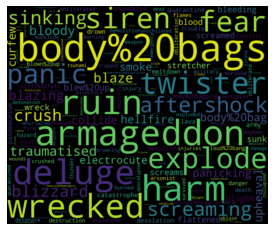

In [13]:
#Wordcloud de False keys en base a su ocurrencia
wordcloud = WordCloud(width=3000,height=2500, max_words= len(freqFalseKeys),relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freqFalseKeys)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

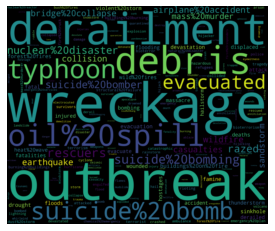

In [14]:
#Wordcloud de True keys en base a su ocurrencia
wordcloud = WordCloud(width=3000,height=2500, max_words=len(freqTrueKeys),relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freqTrueKeys)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
#Las columnas que nos interesan son text y target, las renombramos para que sea mas comodo y facil de medir  
tweets = df_tweets
tweets.head(10)

,id,keyword,location,text,target
0,1,<NA>,<NA>,Our Deeds are the Reason of this #earthquake M...,True
1,4,<NA>,<NA>,Forest fire near La Ronge Sask. Canada,True
2,5,<NA>,<NA>,All residents asked to 'shelter in place' are ...,True
3,6,<NA>,<NA>,"13,000 people receive #wildfires evacuation or...",True
4,7,<NA>,<NA>,Just got sent this photo from Ruby #Alaska as ...,True
5,8,<NA>,<NA>,#RockyFire Update => California Hwy. 20 closed...,True
6,10,<NA>,<NA>,#flood #disaster Heavy rain causes flash flood...,True
7,13,<NA>,<NA>,I'm on top of the hill and I can see a fire in...,True
8,14,<NA>,<NA>,There's an emergency evacuation happening now ...,True
9,15,<NA>,<NA>,I'm afraid that the tornado is coming to our a...,True


In [16]:
#Conseguimos las keywords
ocurrenciasTotales = tweets["keyword"].dropna().value_counts().to_dict()

In [17]:
ocurrenciasKeywordsVerdaderas = freqTrueKeys.to_dict()

In [18]:
ocurrenciasKeywordsFalsas = freqFalseKeys.to_dict()

In [19]:
#Creo un diccionario con las keywords y una tupla que contiene los valores de las ocurrencias verdaderas y las falsas 
# asi no perdemos el orden de la keyword con sus ocurrencias
mergeDict = {}
for key in ocurrenciasTotales:
    mergeDict[key] = (ocurrenciasKeywordsVerdaderas[key] if key in ocurrenciasKeywordsVerdaderas else 0, \
                     ocurrenciasKeywordsFalsas[key] if key in ocurrenciasKeywordsFalsas else 0)


In [20]:
##Pasamos el dict a keys para los graficos
ocurrenciasTrue = []
ocurrenciasFalse = []

for key in mergeDict:
    ocurrenciasTrue.append(mergeDict[key][0])
    ocurrenciasFalse.append(mergeDict[key][1])

keys = list(mergeDict.keys())

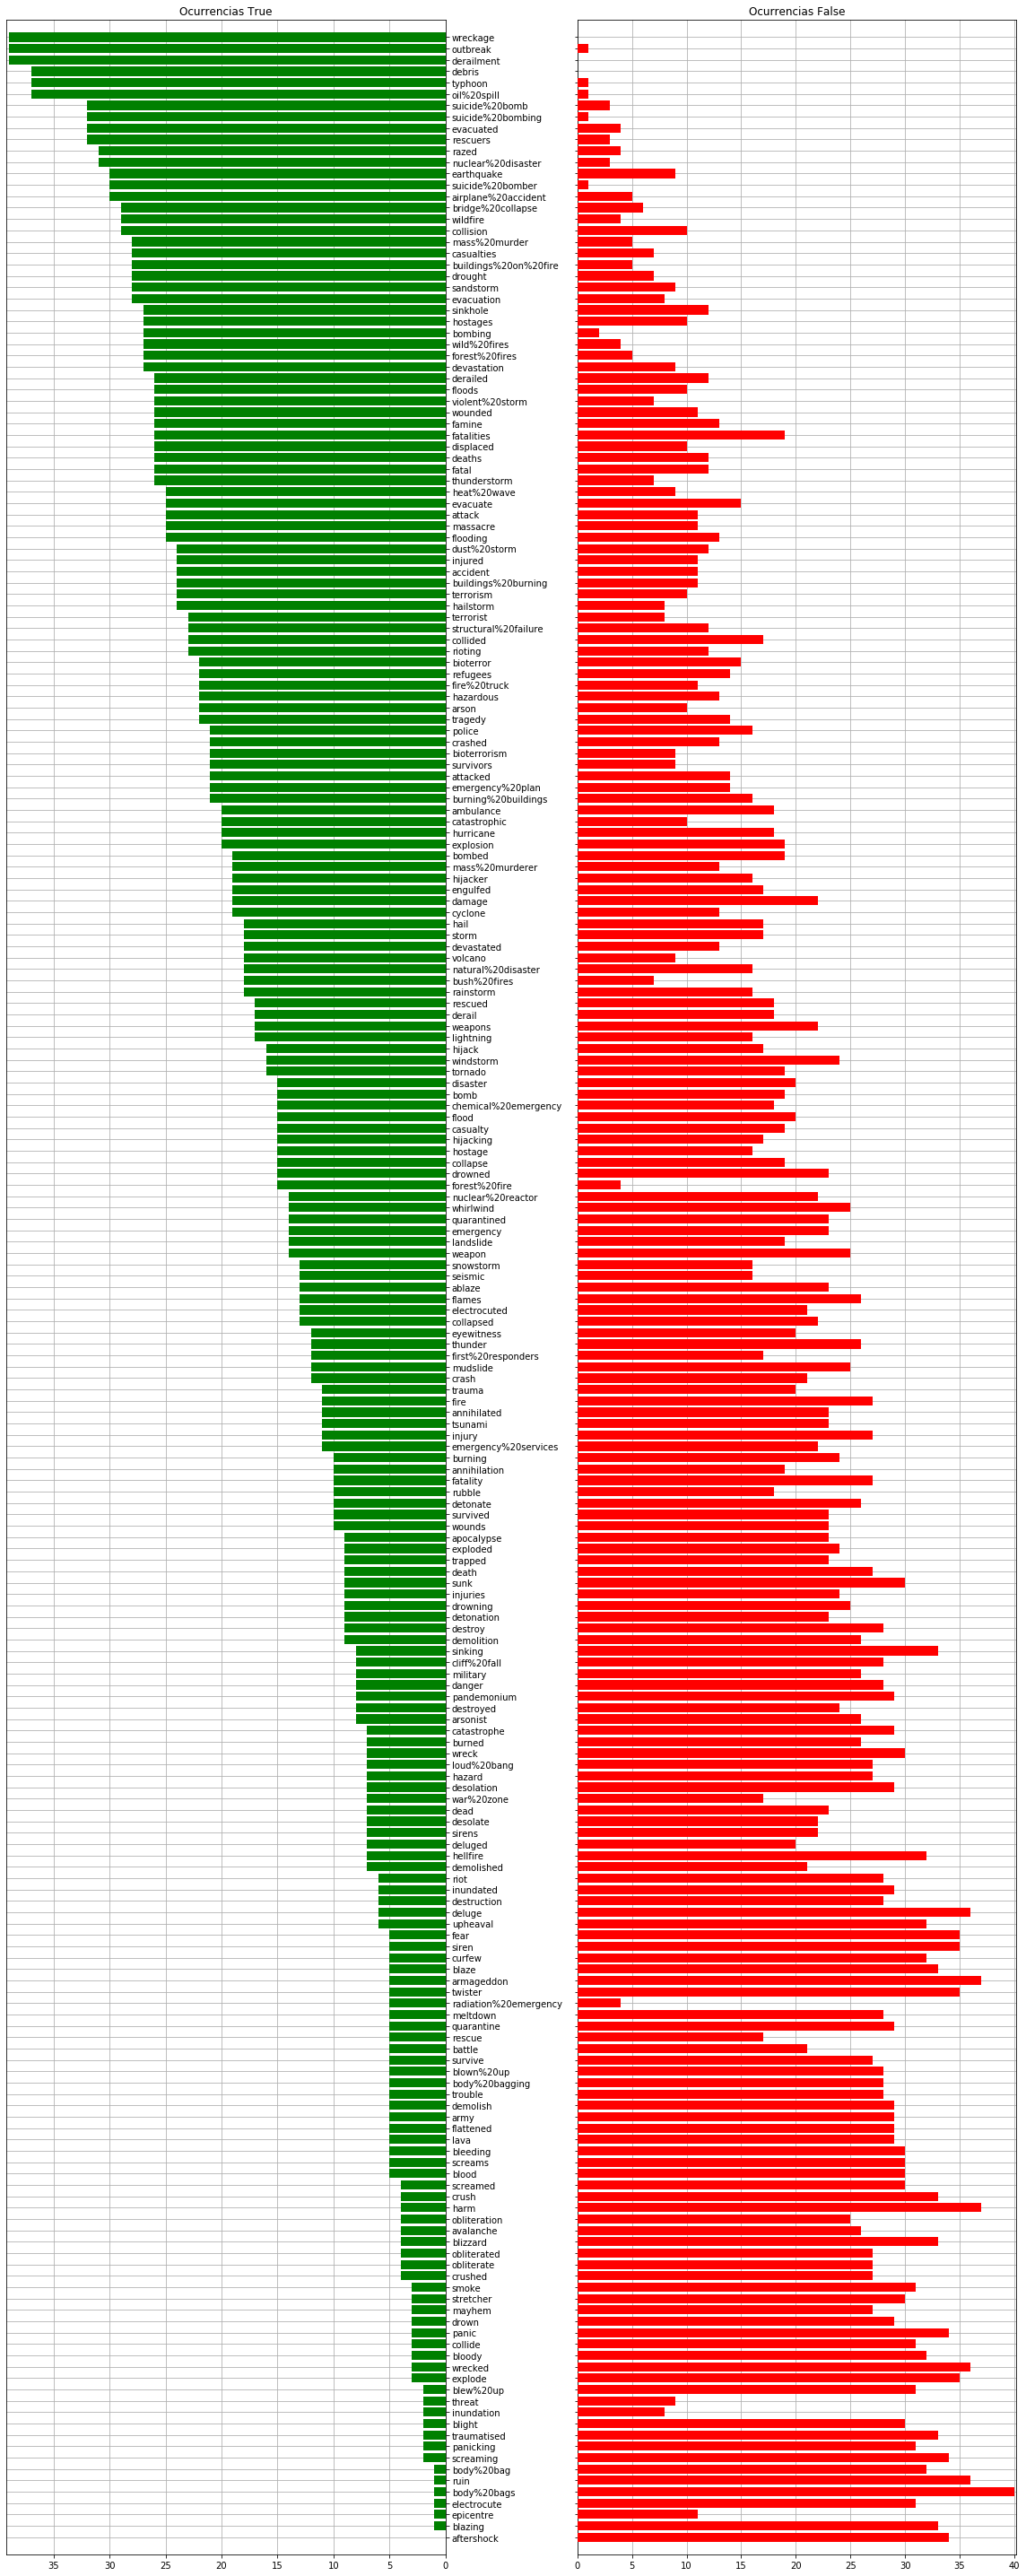

In [21]:
#Ploteamos el pyramid barchart
labels = keys
valuesTrue = np.array(ocurrenciasTrue)
valuesFalse = np.array(ocurrenciasFalse)
                               
idx = valuesTrue.argsort()
labels, valuesTrue, valuesFalse = [np.take(x, idx) for x in [labels, valuesTrue, valuesFalse]]

y = np.arange(valuesFalse.size)

fig, axes = plt.subplots(ncols=2, sharey=True)

fig.set_size_inches(16, 40, forward=True)

axes[0].barh(y, valuesTrue, align='center', color='green', zorder=10)
axes[0].set(title='Ocurrencias True')
axes[1].barh(y, valuesFalse, align='center', color='red', zorder=10)
axes[1].set(title='Ocurrencias False')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=labels)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.005)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
plt.show()

In [22]:
#Agarramos el top 5
keysTrueTop ={}
contador = 0
for key in ocurrenciasKeywordsVerdaderas:
    if contador in range(5):
        keysTrueTop[key] = (mergeDict[key][0],mergeDict[key][1])
    contador+=1
        
labels = list(keysTrueTop.keys())

valuesTrue = []
for key in keysTrueTop:
    valuesTrue.append(keysTrueTop[key][0])


valuesFalse = []
for key in keysTrueTop:
    valuesFalse.append(keysTrueTop[key][1])

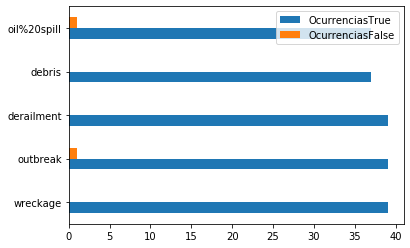

In [23]:
#Este es el top 5 de la lista de keywords
df = pd.DataFrame({'OcurrenciasTrue': valuesTrue,'OcurrenciasFalse': valuesFalse}, index=labels)
ax = df.plot.barh()

In [24]:
#Agarramos el bot 5
keysTrueBot ={}
contador = 0
for key in ocurrenciasKeywordsVerdaderas:
    if contador in range(216,220):
        keysTrueBot[key] = (mergeDict[key][0],mergeDict[key][1])
    contador+=1

##caso particular, no hay trues en aftershock
aftershock = "aftershock"
keysTrueBot[aftershock]= (mergeDict[aftershock][0],mergeDict[aftershock][1])
## 

labels = list(keysTrueBot.keys())
labels

valuesTrue = []
for key in keysTrueBot:
    valuesTrue.append(keysTrueBot[key][0])


valuesFalse = []
for key in keysTrueBot:
    valuesFalse.append(keysTrueBot[key][1])


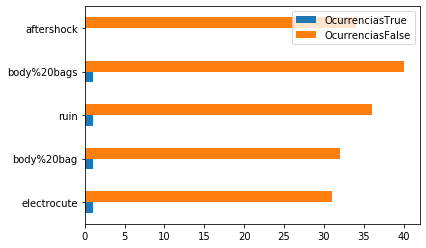

In [25]:
#Este es el bot five de la lista de keywords
df = pd.DataFrame({'OcurrenciasTrue': valuesTrue,'OcurrenciasFalse': valuesFalse}, index=labels)
ax = df.plot.barh()

 ### aca empezamos a analizar en base a location

In [14]:
tweets_with_location = df_tweets.loc[df_tweets['location'].notnull()]
tweets_with_location.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,True
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,False
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,True
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,False
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,False


dato curioso: todos los tweets con location tienen keyword tambien

In [15]:
#casteo target de bool a int para poder sumarlo
tweets_with_location['target'] = tweets_with_location['target'].astype(int)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#agrupo los tweets por location
grouped_by_location = tweets_with_location.groupby(['location']).agg({'location':['count'], 'target':['sum'] })
grouped_by_location.sort_values(('location', 'count'), ascending = False).head(10)

,location,target
,count,sum
location,,
USA,104,67
New York,71,16
United States,50,27
London,45,16
Canada,29,13
Nigeria,28,22
UK,27,16
"Los Angeles, CA",26,8


In [17]:
#creo una nueva columna que contiene la cantidad tweets falsos para cada location
grouped_by_location[('target', 'false_tweets')] = grouped_by_location[('location', 'count')] - grouped_by_location[('target', 'sum')]
grouped_by_location.sort_values(('target', 'false_tweets'), ascending = False).head()

location target             
                   count    sum false_tweets
location                                    
New York              71     16           55
USA                  104     67           37
London                45     16           29
United States         50     27           23
Los Angeles, CA       26      8           18

 CANTIDAD TOTAL DE LOCATIONS = 3342

In [18]:
#busco las locations que solo tienen tweets Falsos. Muestro el top 5
only_false_tweets = grouped_by_location.loc[grouped_by_location[('location','count')] == grouped_by_location[('target', 'false_tweets')]]
only_false_tweets.sort_values(('location', 'count'), ascending = False).head(5)

location target             
                     count    sum false_tweets
location                                      
304                      9      0            9
Pennsylvania, USA        7      0            7
Morioh, Japan            6      0            6
Wisconsin                5      0            5
Coventry                 5      0            5

In [19]:
#cuento cuantas locations SOLO tienen tweets falsos
only_false_tweets.count()

location  count           1828
target    sum             1828
          false_tweets    1828
dtype: int64

In [20]:
#calculo el porcentaje de locations que solo tiene tweets falsos
pct_only_false = 1828/3342*100
pct_only_false

54.69778575703172

54,69% de las locations usadas solo contienen tweets falsos

In [21]:
#busco las locations que solo tienen tweets verdaderos. Muestro el top 5
only_true_tweets = grouped_by_location.loc[grouped_by_location[('location','count')] == grouped_by_location[('target', 'sum')]]
only_true_tweets.sort_values(('location', 'count'), ascending = False).head()

location target             
                               count    sum false_tweets
location                                                
Portland, Oregon                   4      4            0
Midwest                            4      4            0
Calgary                            4      4            0
canada                             4      4            0
Jakarta/Kuala Lumpur/S'pore        4      4            0

In [22]:
only_true_tweets.count()

location  count           1199
target    sum             1199
          false_tweets    1199
dtype: int64

In [23]:
pct_only_true = 1199/3342*100
pct_only_true

35.87672052663076

35.87% de todas las locations contienen tweets que solamente son verdaderos

In [24]:
#calculo porcentaje de locations que tienen tanto tweets verdaderos como falsos
100 -pct_only_true - pct_only_false

9.42549371633752

Solo 9% de las locations tienen tweets tantos verdaderos como falsos

podemos hacer un pie chart de estos porcentajes

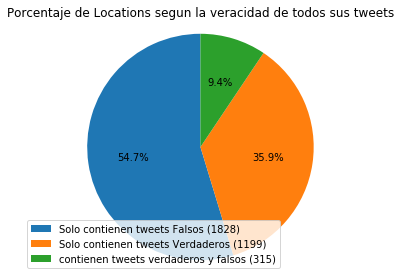

In [25]:
labels = [r'Solo contienen tweets Falsos (1828)', r'Solo contienen tweets Verdaderos (1199)', 
r'contienen tweets verdaderos y falsos (315)']
sizes = [54.7, 35.9, 9.4]

patches, texts, _ = plt.pie(sizes, autopct = '%1.1f%%', startangle=90)
plt.legend(patches, labels, loc="best")


plt.title('Porcentaje de Locations segun la veracidad de todos sus tweets')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()